In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
x= df.drop(columns=["Outcome"])
y= df["Outcome"]

In [7]:
x.shape

(768, 8)

In [8]:
y.shape

(768,)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Bagging meta estimator classifier
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(n_estimators=100).fit(x_train, y_train)
ypred=model.predict(x_test)


accuracy_score: 0.7987012987012987
Classification report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



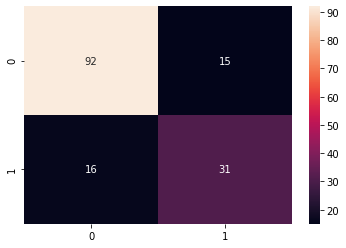

In [11]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("accuracy_score:", accuracy_score(y_test, ypred))
cm= confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True)
print("Classification report:", classification_report(y_test, ypred))

In [12]:
# Bagging meta estimator classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
# making the bagging classifier with 100 Logistic Regression models
model= BaggingClassifier(base_estimator=LogisticRegression() ,  n_estimators=100)
model.fit(x_train, y_train)
ypred= model.predict(x_test)

accuracy is: 0.8311688311688312
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.78      0.62      0.69        47

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154



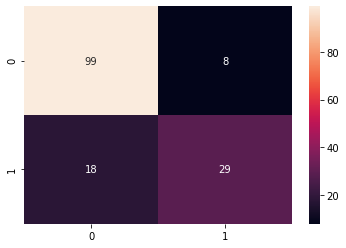

In [14]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("accuracy is:", accuracy_score(y_test,ypred))
cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, ypred))

In [15]:
# Gradient Boosting
x_test.shape

(154, 8)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier().fit(x_train, y_train)
ypred=model.predict(x_test)


accuracy is: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



<AxesSubplot:>

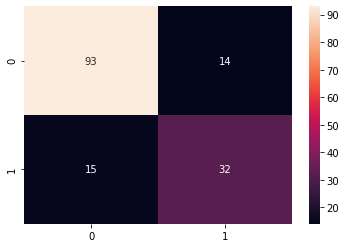

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("accuracy is:", accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))
cm=confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True)

In [18]:
# Adaptive boost or AdaBoost
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7792207792207793